# Installing pycaret library

In [ ]:
!pip install pycaret

# Importing the necessary libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import setup,RegressionExperiment,compare_models,predict_model,plot_model
from pycaret.classification import ClassificationExperiment
from sklearn.decomposition import PCA
import matplotlib

# Reading all three CSVs 

In [3]:
high_tur=pd.read_csv("/kaggle/input/water-level-identification-with-lidar/water-level_turbidity-high.csv")
low_tur=pd.read_csv("/kaggle/input/water-level-identification-with-lidar/water-level_turbidity-low.csv")
med_tur=pd.read_csv("/kaggle/input/water-level-identification-with-lidar/water-level_turbidity-medium.csv")

# Plotting the water levels in each of the datasets

## There are seven water levels in each dataset

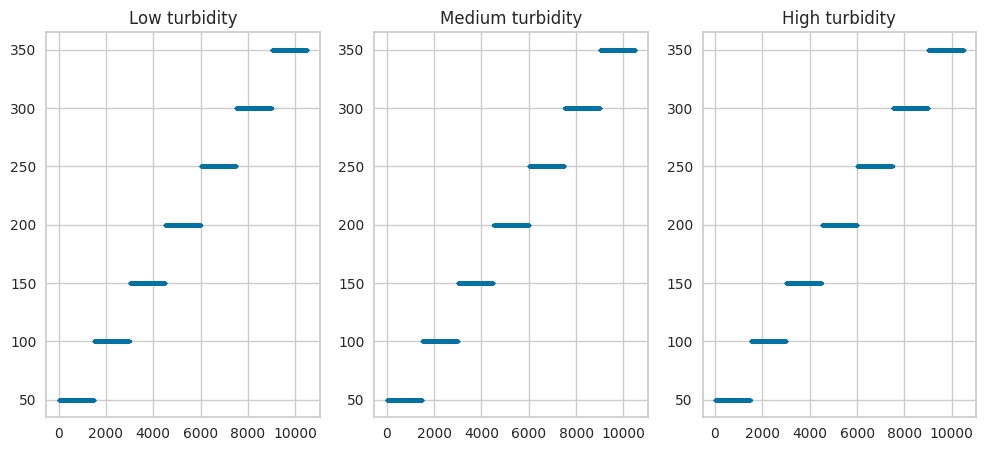

In [73]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title("Low turbidity")
plt.scatter(low_tur["id"],low_tur["water_level"],s=4)
plt.subplot(1,3,2)
plt.title("Medium turbidity")
plt.scatter(med_tur["id"],low_tur["water_level"],s=4)
plt.subplot(1,3,3)
plt.title("High turbidity")
plt.scatter(high_tur["id"],low_tur["water_level"],s=4)
plt.show()

# Info about each dataset

In [4]:
high_tur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10500 non-null  int64  
 1   ir_value     10500 non-null  float64
 2   ir_strength  10500 non-null  float64
 3   us_value     10500 non-null  float64
 4   acc_x        10500 non-null  float64
 5   acc_y        10500 non-null  float64
 6   acc_z        10500 non-null  float64
 7   gyr_acc_x    10500 non-null  float64
 8   gyr_acc_y    10500 non-null  float64
 9   gyr_acc_z    10500 non-null  float64
 10  gyr_x        10500 non-null  float64
 11  gyr_y        10500 non-null  float64
 12  gyr_z        10500 non-null  float64
 13  angle        10500 non-null  float64
 14  water_level  10500 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [5]:
med_tur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10500 non-null  int64  
 1   ir_value     10500 non-null  float64
 2   ir_strength  10500 non-null  float64
 3   us_value     10500 non-null  float64
 4   acc_x        10500 non-null  float64
 5   acc_y        10500 non-null  float64
 6   acc_z        10500 non-null  float64
 7   gyr_acc_x    10500 non-null  float64
 8   gyr_acc_y    10500 non-null  float64
 9   gyr_acc_z    10500 non-null  float64
 10  gyr_x        10500 non-null  float64
 11  gyr_y        10500 non-null  float64
 12  gyr_z        10500 non-null  float64
 13  angle        10500 non-null  float64
 14  water_level  10500 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


In [6]:
low_tur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10500 non-null  int64  
 1   ir_value     10500 non-null  float64
 2   ir_strength  10500 non-null  float64
 3   us_value     10500 non-null  float64
 4   acc_x        10500 non-null  float64
 5   acc_y        10500 non-null  float64
 6   acc_z        10500 non-null  float64
 7   gyr_acc_x    10500 non-null  float64
 8   gyr_acc_y    10500 non-null  float64
 9   gyr_acc_z    10500 non-null  float64
 10  gyr_x        10500 non-null  float64
 11  gyr_y        10500 non-null  float64
 12  gyr_z        10500 non-null  float64
 13  angle        10500 non-null  float64
 14  water_level  10500 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.2 MB


# Dropping the "id" column from each dataset

In [7]:
feat_high_tur=high_tur.drop(["id"],axis=1)
feat_high_tur.head()

,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level
0,51.0,4839.0,49.8730,1.024,0.152,2.044,-0.003662,0.970947,-0.145264,-0.465649,0.503817,-0.267176,0.0,50.0
1,52.0,5256.0,49.8648,1.024,0.168,2.044,-0.011230,0.964355,-0.143799,-0.450382,0.488550,-0.267176,0.0,50.0
2,51.0,4371.0,49.8689,1.032,0.160,2.044,-0.007080,0.974609,-0.140869,-0.473282,0.503817,-0.267176,0.0,50.0
3,51.0,4734.0,49.8812,1.104,0.152,2.044,-0.010498,0.962402,-0.171387,-0.458015,0.511450,-0.267176,0.0,50.0
4,51.0,3553.0,50.2945,1.144,0.152,2.044,-0.007080,0.958740,-0.148926,-0.442748,0.488550,-0.267176,0.0,50.0


In [8]:
feat_med_tur=med_tur.drop(["id"],axis=1)
feat_med_tur.head()

,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level
0,52.0,14375.0,50.5809,0.944,0.200,2.044,-0.014404,0.961914,-0.157959,-0.435115,0.488550,-0.251908,0.0,50.0
1,52.0,13429.0,50.5850,1.040,0.152,2.044,-0.012207,0.971680,-0.149658,-0.427481,0.496183,-0.236641,0.0,50.0
2,52.0,13482.0,50.6464,1.048,0.144,2.044,-0.012207,0.960693,-0.158447,-0.458015,0.480916,-0.251908,0.0,50.0
3,52.0,13411.0,50.5850,1.024,0.176,2.016,-0.016357,0.970703,-0.144043,-0.435115,0.473282,-0.267176,0.0,50.0
4,52.0,12985.0,50.5850,1.024,0.168,2.044,-0.010010,0.970459,-0.170898,-0.435115,0.488550,-0.259542,0.0,50.0


In [9]:
feat_low_tur=low_tur.drop(["id"],axis=1)
feat_low_tur.head()

,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level
0,51.0,11255.0,49.5743,1.048,0.144,2.044,-0.000488,0.971191,-0.144531,-0.473282,0.458015,-0.259542,0.0,50.0
1,51.0,11245.0,49.5661,1.048,0.160,2.044,0.008545,0.961426,-0.142334,-0.458015,0.480916,-0.274809,0.0,50.0
2,51.0,11237.0,49.5702,1.064,0.128,2.044,0.009766,0.963379,-0.151855,-0.442748,0.473282,-0.274809,0.0,50.0
3,51.0,11253.0,49.5375,1.056,0.112,2.044,0.006348,0.963623,-0.142334,-0.465649,0.473282,-0.259542,0.0,50.0
4,51.0,11253.0,49.5702,1.144,0.112,2.044,0.008057,0.966797,-0.153320,-0.480916,0.488550,-0.259542,0.0,50.0


# Principal Component Analysis

In [77]:
pca_low = PCA(n_components=2)
pca_med=PCA(n_components=2)
pca_high=PCA(n_components=2)

In [103]:
colors=["red","yellow","blue","green","purple","orange","black"]

### Plotting the 2 principal components versus each other with water levels corresponding to the colormap

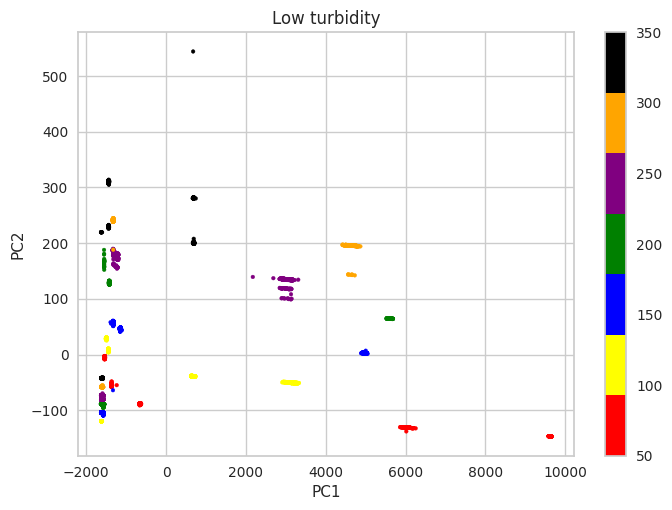

In [115]:
pca_low_val=pca_low.fit_transform(feat_low_tur.drop(["water_level"],axis=1))
pca_low_val=pd.DataFrame(pca_low_val,columns=["PC1","PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Low turbidity")
plt.scatter(pca_low_val["PC1"],pca_low_val["PC2"],c=feat_low_tur["water_level"],cmap=matplotlib.colors.ListedColormap(colors),s=7)
plt.colorbar()
plt.show()

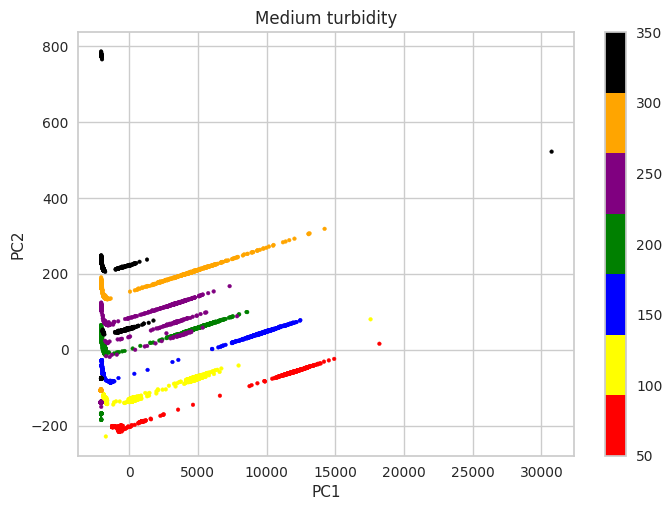

In [116]:
pca_med_val=pca_med.fit_transform(feat_med_tur.drop(["water_level"],axis=1))
pca_med_val=pd.DataFrame(pca_med_val,columns=["PC1","PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Medium turbidity")
plt.scatter(pca_med_val["PC1"],pca_med_val["PC2"],c=feat_med_tur["water_level"],cmap=matplotlib.colors.ListedColormap(colors),s=7)
plt.colorbar()
plt.show()

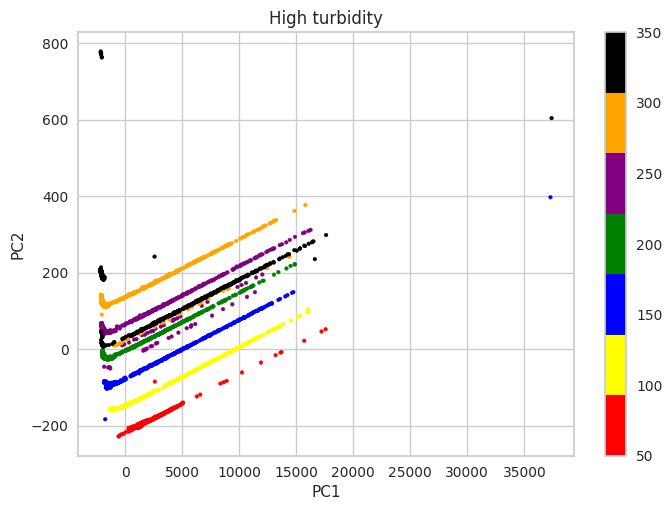

In [117]:
pca_high_val=pca_low.fit_transform(feat_high_tur.drop(["water_level"],axis=1))
pca_high_val=pd.DataFrame(pca_high_val,columns=["PC1","PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("High turbidity")
plt.scatter(pca_high_val["PC1"],pca_high_val["PC2"],c=feat_high_tur["water_level"],cmap=matplotlib.colors.ListedColormap(colors),s=7)
plt.colorbar()
plt.show()

# Predicting  the water level on high turbidity data

In [10]:
exp = RegressionExperiment()

In [11]:
exp.setup(feat_high_tur, target = 'water_level', session_id = 123)

,Description,Value
0,Session id,123
1,Target,water_level
2,Target type,Regression
3,Original data shape,"(10500, 14)"
4,Transformed data shape,"(10500, 14)"
5,Transformed train set shape,"(7349, 14)"
6,Transformed test set shape,"(3151, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0344,1.2147,0.6784,0.9999,0.0032,0.0001,0.1880
dt,Decision Tree Regressor,0.0204,1.7025,0.5535,0.9998,0.0018,0.0001,0.0180
catboost,CatBoost Regressor,0.6062,2.0886,1.2744,0.9998,0.0083,0.0039,3.1910
xgboost,Extreme Gradient Boosting,0.0502,2.1631,0.8842,0.9998,0.0030,0.0002,0.1180
rf,Random Forest Regressor,0.0460,2.0888,0.9501,0.9998,0.0037,0.0002,0.4390
gbr,Gradient Boosting Regressor,0.2015,2.4814,1.2863,0.9997,0.0048,0.0009,0.5260
lightgbm,Light Gradient Boosting Machine,0.2456,3.4676,1.5543,0.9996,0.0059,0.0011,0.4920
ada,AdaBoost Regressor,1.4946,28.5555,5.2765,0.9971,0.0169,0.0049,0.0940
lr,Linear Regression,5.0881,40.5142,6.3487,0.9960,0.0604,0.0387,0.5480
en,Elastic Net,5.0805,41.1046,6.3943,0.9959,0.0570,0.0373,0.0150


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

### The best model is Extra Trees Regressor with MAPE of 0.0001

### Predicting the water level of low turbidity on the Extra Trees Regressor which gave good prediction on high turbidity.

In [13]:
exp.predict_model(best,data=feat_low_tur)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,38.6673,4511.3861,67.1669,0.5489,0.3041,0.1709


,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level,prediction_label
0,51.0,11255.0,49.574299,1.048,0.144,2.044,-0.000488,0.971191,-0.144531,-0.473282,0.458015,-0.259542,0.0,50.0,50.0
1,51.0,11245.0,49.566101,1.048,0.160,2.044,0.008545,0.961426,-0.142334,-0.458015,0.480916,-0.274809,0.0,50.0,50.0
2,51.0,11237.0,49.570202,1.064,0.128,2.044,0.009766,0.963379,-0.151855,-0.442748,0.473282,-0.274809,0.0,50.0,50.0
3,51.0,11253.0,49.537498,1.056,0.112,2.044,0.006348,0.963623,-0.142334,-0.465649,0.473282,-0.259542,0.0,50.0,50.0
4,51.0,11253.0,49.570202,1.144,0.112,2.044,0.008057,0.966797,-0.153320,-0.480916,0.488550,-0.259542,0.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0.0,43.0,350.240997,0.984,0.384,2.044,-0.181152,0.942139,-0.161377,-0.465649,0.496183,-0.282443,10.0,350.0,180.0
10496,0.0,42.0,350.235992,1.080,0.368,2.044,-0.158447,0.941406,-0.146729,-0.473282,0.496183,-0.267176,10.0,350.0,180.0
10497,0.0,34.0,350.227997,1.024,0.368,2.024,-0.169678,0.941650,-0.153076,-0.465649,0.488550,-0.267176,10.0,350.0,180.0
10498,0.0,44.0,350.641998,1.024,0.384,2.044,-0.180176,0.945557,-0.140625,-0.488550,0.503817,-0.274809,10.0,350.0,180.0


### As seen above, the model performing well on one level turbidity does not give good prediction on another turbidity.

In [14]:
exp.predict_model(best,data=feat_med_tur)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,17.8690,1306.4591,36.1450,0.8694,0.1647,0.0854


,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level,prediction_label
0,52.0,14375.0,50.580898,0.944,0.200,2.044,-0.014404,0.961914,-0.157959,-0.435115,0.488550,-0.251908,0.0,50.0,50.0
1,52.0,13429.0,50.584999,1.040,0.152,2.044,-0.012207,0.971680,-0.149658,-0.427481,0.496183,-0.236641,0.0,50.0,50.0
2,52.0,13482.0,50.646400,1.048,0.144,2.044,-0.012207,0.960693,-0.158447,-0.458015,0.480916,-0.251908,0.0,50.0,50.0
3,52.0,13411.0,50.584999,1.024,0.176,2.016,-0.016357,0.970703,-0.144043,-0.435115,0.473282,-0.267176,0.0,50.0,50.0
4,52.0,12985.0,50.584999,1.024,0.168,2.044,-0.010010,0.970459,-0.170898,-0.435115,0.488550,-0.259542,0.0,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,412.0,101.0,347.204010,1.024,0.352,1.968,-0.176025,0.945801,-0.152832,-0.503817,0.496183,-0.267176,10.0,350.0,350.0
10496,0.0,106.0,349.524994,1.064,0.400,2.044,-0.178467,0.938232,-0.142822,-0.511450,0.496183,-0.274809,10.0,350.0,180.0
10497,411.0,104.0,348.489014,1.024,0.408,2.044,-0.179932,0.946777,-0.127441,-0.496183,0.511450,-0.259542,10.0,350.0,350.0
10498,411.0,109.0,346.820007,1.016,0.368,2.044,-0.177490,0.937500,-0.146240,-0.473282,0.511450,-0.244275,10.0,350.0,350.0


# Creating an overall dataset with turbidity column

In [15]:
feat_low_tur["tur"]=0
feat_med_tur["tur"]=1
feat_high_tur["tur"]=2

### Low turbidity -> 0, Medium turbidity -> 1, High turbidity -> 2

In [16]:
overall_df=pd.concat([feat_low_tur,feat_med_tur,feat_high_tur])

In [17]:
overall_df.reset_index(drop=True,inplace=True)

In [18]:
overall_df

,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level,tur
0,51.0,11255.0,49.5743,1.048,0.144,2.044,-0.000488,0.971191,-0.144531,-0.473282,0.458015,-0.259542,0.0,50.0,0
1,51.0,11245.0,49.5661,1.048,0.160,2.044,0.008545,0.961426,-0.142334,-0.458015,0.480916,-0.274809,0.0,50.0,0
2,51.0,11237.0,49.5702,1.064,0.128,2.044,0.009766,0.963379,-0.151855,-0.442748,0.473282,-0.274809,0.0,50.0,0
3,51.0,11253.0,49.5375,1.056,0.112,2.044,0.006348,0.963623,-0.142334,-0.465649,0.473282,-0.259542,0.0,50.0,0
4,51.0,11253.0,49.5702,1.144,0.112,2.044,0.008057,0.966797,-0.153320,-0.480916,0.488550,-0.259542,0.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31495,398.0,177.0,348.1290,0.888,0.408,2.044,-0.156982,0.965332,-0.155273,-0.473282,0.458015,-0.267176,10.0,350.0,2
31496,400.0,178.0,349.8930,1.032,0.384,2.044,-0.176025,0.952637,-0.169678,-0.480916,0.526718,-0.290076,10.0,350.0,2
31497,399.0,168.0,349.8640,1.072,0.376,2.044,-0.172119,0.947998,-0.152344,-0.480916,0.557252,-0.274809,10.0,350.0,2
31498,399.0,169.0,349.4430,0.992,0.256,2.044,-0.174316,0.941406,-0.152832,-0.496183,0.511450,-0.267176,10.0,350.0,2


# Predicting water level using overall dataset

In [19]:
exp1 = RegressionExperiment()

In [20]:
exp1.setup(overall_df, target = 'water_level', session_id = 125)

,Description,Value
0,Session id,125
1,Target,water_level
2,Target type,Regression
3,Original data shape,"(31500, 15)"
4,Transformed data shape,"(31500, 15)"
5,Transformed train set shape,"(22050, 15)"
6,Transformed test set shape,"(9450, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [21]:
overall_best=exp1.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0091,0.9070,0.4259,0.9999,0.0014,0.0000,0.0820
gbr,Gradient Boosting Regressor,0.2344,0.8621,0.7735,0.9999,0.0037,0.0015,4.1230
rf,Random Forest Regressor,0.0128,0.5755,0.4661,0.9999,0.0018,0.0000,3.3390
et,Extra Trees Regressor,0.0567,0.8989,0.7571,0.9999,0.0038,0.0003,1.3890
xgboost,Extreme Gradient Boosting,0.0790,2.4594,1.4964,0.9998,0.0056,0.0003,0.5790
catboost,CatBoost Regressor,0.4015,1.6036,1.1869,0.9998,0.0064,0.0024,5.1760
lightgbm,Light Gradient Boosting Machine,0.1726,2.4627,1.4522,0.9998,0.0071,0.0008,0.5730
knn,K Neighbors Regressor,1.4667,69.4240,8.2728,0.9931,0.0516,0.0092,0.1030
ada,AdaBoost Regressor,5.2134,80.9923,8.3079,0.9919,0.0738,0.0465,1.4650
br,Bayesian Ridge,27.3404,2281.0278,47.6404,0.7721,0.2520,0.1918,0.0560


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [23]:
exp1.evaluate_model(overall_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [30]:
exp1.evaluate_model(overall_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### The best model is Decision Tree with MAPE of 0.0000

## Scatter plot of the 2 most relevent features (ir_value, us_value) for each turbidity

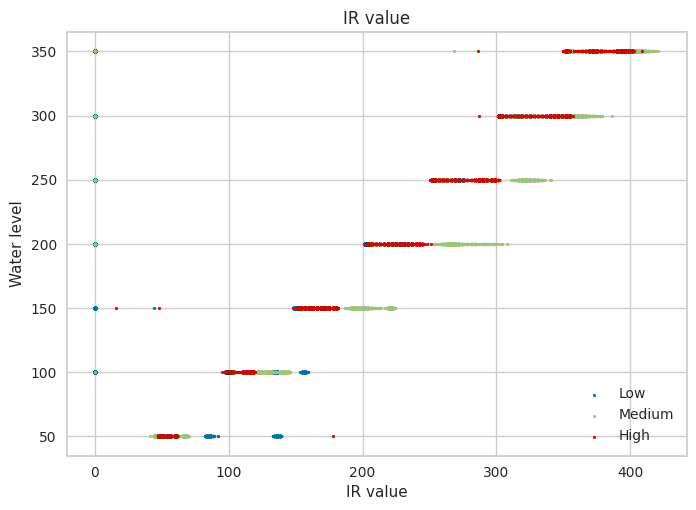

In [119]:
plt.title("IR value")
plt.xlabel("IR value")
plt.ylabel("Water level")
plt.scatter(feat_low_tur["ir_value"],feat_low_tur["water_level"],s=4,label="Low")
plt.scatter(feat_med_tur["ir_value"],feat_med_tur["water_level"],s=4,label="Medium")
plt.scatter(feat_high_tur["ir_value"],feat_high_tur["water_level"],s=4,label="High")
plt.legend()
plt.show()

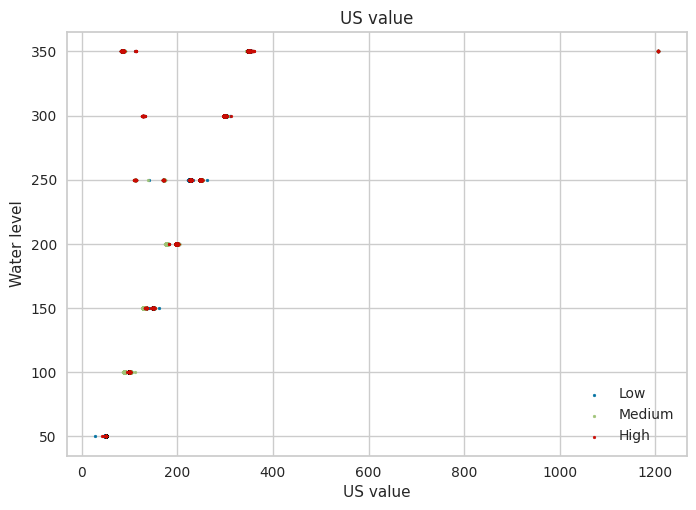

In [120]:
plt.title("US value")
plt.xlabel("US value")
plt.ylabel("Water level")
plt.scatter(feat_low_tur["us_value"],feat_low_tur["water_level"],s=4,label="Low")
plt.scatter(feat_med_tur["us_value"],feat_med_tur["water_level"],s=4,label="Medium")
plt.scatter(feat_high_tur["us_value"],feat_high_tur["water_level"],s=4,label="High")
plt.legend()
plt.show()

# Predicting water level on overall dataset using only the 3 important features: us_value, ir_value, water_level

In [34]:
three_feat=overall_df[["us_value","ir_value","tur","water_level"]]

In [35]:
three_feat

,us_value,ir_value,tur,water_level
0,49.5743,51.0,0,50.0
1,49.5661,51.0,0,50.0
2,49.5702,51.0,0,50.0
3,49.5375,51.0,0,50.0
4,49.5702,51.0,0,50.0
...,...,...,...,...
31495,348.1290,398.0,2,350.0
31496,349.8930,400.0,2,350.0
31497,349.8640,399.0,2,350.0
31498,349.4430,399.0,2,350.0


In [36]:
exp2 = RegressionExperiment()

In [37]:
exp2.setup(three_feat, target = 'water_level', session_id = 125)

,Description,Value
0,Session id,125
1,Target,water_level
2,Target type,Regression
3,Original data shape,"(31500, 4)"
4,Transformed data shape,"(31500, 4)"
5,Transformed train set shape,"(22050, 4)"
6,Transformed test set shape,"(9450, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [38]:
three_feat_best=exp2.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0045,0.4535,0.2130,1.0000,0.0007,0.0000,0.0200
rf,Random Forest Regressor,0.0095,0.5260,0.4165,0.9999,0.0016,0.0000,0.4210
et,Extra Trees Regressor,0.0272,0.8737,0.6944,0.9999,0.0037,0.0001,0.2260
gbr,Gradient Boosting Regressor,0.2460,0.8260,0.7546,0.9999,0.0038,0.0015,0.5210
knn,K Neighbors Regressor,0.0086,0.5941,0.4046,0.9999,0.0014,0.0000,0.0280
catboost,CatBoost Regressor,0.2489,1.7945,1.2117,0.9998,0.0056,0.0014,3.8610
xgboost,Extreme Gradient Boosting,0.0623,2.6658,1.5064,0.9997,0.0055,0.0002,0.0960
lightgbm,Light Gradient Boosting Machine,0.1489,2.5354,1.4997,0.9997,0.0072,0.0007,0.3570
ada,AdaBoost Regressor,5.0048,75.9615,8.3453,0.9924,0.0734,0.0437,0.1920
br,Bayesian Ridge,27.2727,2358.5277,48.4354,0.7643,0.2603,0.1971,0.0170


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [39]:
exp2.predict_model(three_feat_best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,us_value,ir_value,tur,water_level,prediction_label
23900,99.005402,117.0,2,100.0,100.0
10449,349.372986,0.0,0,350.0,350.0
20727,349.700012,409.0,1,350.0,350.0
14150,129.175995,193.0,1,150.0,150.0
1711,98.428398,99.0,0,100.0,100.0
...,...,...,...,...,...
11484,50.229000,61.0,1,50.0,50.0
2235,98.878601,135.0,0,100.0,100.0
5680,200.343002,0.0,0,200.0,200.0
8777,299.398010,0.0,0,300.0,300.0


### The best model is Decision Tree Regressor with MAPE of 0.0000

In [41]:
exp2.evaluate_model(three_feat_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Classification of the turbidity of water using the overall dataset 

In [44]:
exp3 = ClassificationExperiment()

In [45]:
overalldf_no_water_level=overall_df.drop(["water_level"],axis=1)

In [47]:
exp3.setup(overalldf_no_water_level, target = 'tur', session_id = 125)

,Description,Value
0,Session id,125
1,Target,tur
2,Target type,Multiclass
3,Original data shape,"(31500, 14)"
4,Transformed data shape,"(31500, 14)"
5,Transformed train set shape,"(22050, 14)"
6,Transformed test set shape,"(9450, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [48]:
tur_class_best=exp3.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9914,0.9997,0.9914,0.9914,0.9914,0.9871,0.9871,0.6480
lightgbm,Light Gradient Boosting Machine,0.9914,0.9997,0.9914,0.9914,0.9914,0.9871,0.9872,1.9710
catboost,CatBoost Classifier,0.9904,0.9996,0.9904,0.9904,0.9904,0.9856,0.9856,11.1940
et,Extra Trees Classifier,0.9836,0.9993,0.9836,0.9836,0.9836,0.9754,0.9754,0.8400
rf,Random Forest Classifier,0.9800,0.9990,0.9800,0.9800,0.9799,0.9699,0.9700,1.4320
gbc,Gradient Boosting Classifier,0.9717,0.9979,0.9717,0.9717,0.9717,0.9576,0.9576,5.2060
dt,Decision Tree Classifier,0.9715,0.9786,0.9715,0.9715,0.9715,0.9572,0.9572,0.0930
knn,K Neighbors Classifier,0.9462,0.9866,0.9462,0.9460,0.9460,0.9193,0.9195,0.1040
ada,Ada Boost Classifier,0.7068,0.8239,0.7068,0.7366,0.6986,0.5603,0.5751,0.5300
qda,Quadratic Discriminant Analysis,0.5475,0.7531,0.5475,0.5757,0.5175,0.3213,0.3573,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [49]:
exp3.predict_model(tur_class_best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9930,0.9998,0.9930,0.9930,0.9930,0.9895,0.9895


,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,tur,prediction_label,prediction_score
16832,260.0,535.0,248.464996,0.880,0.160,2.044,-0.038818,0.971191,-0.154785,-0.503817,0.511450,-0.267176,2.5,1,1,0.9957
5974,0.0,86.0,199.839996,1.032,0.240,1.984,-0.083008,0.956299,-0.150879,-0.458015,0.488550,-0.274809,5.0,0,0,1.0000
8235,0.0,69.0,298.919006,1.056,0.256,2.044,-0.079590,0.957520,-0.149170,-0.465649,0.496183,-0.267176,5.0,0,0,0.9996
15640,268.0,141.0,200.761002,1.120,0.248,2.044,-0.087646,0.961670,-0.146484,-0.503817,0.496183,-0.267176,5.0,1,1,0.9999
9362,371.0,219.0,84.041000,0.984,0.256,2.044,-0.049805,0.957275,-0.153564,-0.473282,0.503817,-0.259542,2.5,0,0,0.9795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18251,303.0,5340.0,298.791992,1.056,0.152,2.044,-0.001953,0.966553,-0.149170,-0.450382,0.458015,-0.267176,0.0,1,1,0.9981
23125,112.0,1439.0,99.721497,1.072,0.248,2.044,-0.089600,0.954346,-0.146973,-0.458015,0.488550,-0.267176,5.0,2,2,0.9994
24639,172.0,617.0,148.738998,1.008,0.384,2.044,-0.080566,0.963379,-0.154541,-0.473282,0.488550,-0.259542,5.0,2,2,0.9850
30425,373.0,297.0,348.795990,0.984,0.184,2.044,-0.051758,0.961182,-0.145264,-0.496183,0.480916,-0.267176,2.5,2,2,0.9795


### The best model is XGBoost with F1 score 99.30%

In [50]:
exp3.evaluate_model(tur_class_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predicting the water level using the overall dataset without turbidity information

In [51]:
overall_df_no_tur=overall_df.drop(["tur"],axis=1)

In [53]:
exp4 = RegressionExperiment()
exp4.setup(overall_df_no_tur, target = 'water_level', session_id = 125)

,Description,Value
0,Session id,125
1,Target,water_level
2,Target type,Regression
3,Original data shape,"(31500, 14)"
4,Transformed data shape,"(31500, 14)"
5,Transformed train set shape,"(22050, 14)"
6,Transformed test set shape,"(9450, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [54]:
best_overall_water_level=exp4.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0045,0.4535,0.2130,1.0000,0.0007,0.0000,0.0430
rf,Random Forest Regressor,0.0118,0.5520,0.4319,0.9999,0.0017,0.0000,1.1980
et,Extra Trees Regressor,0.0511,0.7913,0.6779,0.9999,0.0036,0.0002,0.4870
gbr,Gradient Boosting Regressor,0.2345,0.8666,0.7778,0.9999,0.0037,0.0015,1.5540
catboost,CatBoost Regressor,0.3959,2.0396,1.2794,0.9998,0.0067,0.0024,5.2890
xgboost,Extreme Gradient Boosting,0.0790,2.4053,1.4782,0.9998,0.0056,0.0003,0.2250
lightgbm,Light Gradient Boosting Machine,0.1891,2.6385,1.5210,0.9997,0.0073,0.0009,0.5770
knn,K Neighbors Regressor,1.4667,69.4240,8.2728,0.9931,0.0516,0.0092,0.0580
ada,AdaBoost Regressor,4.8977,76.6101,8.2152,0.9924,0.0790,0.0470,0.5070
ridge,Ridge Regression,27.9554,2347.6968,48.3257,0.7654,0.2558,0.1979,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [55]:
exp4.predict_model(best_overall_water_level)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,ir_value,ir_strength,us_value,acc_x,acc_y,acc_z,gyr_acc_x,gyr_acc_y,gyr_acc_z,gyr_x,gyr_y,gyr_z,angle,water_level,prediction_label
23900,117.0,964.0,99.005402,0.952,0.368,2.044,-0.180420,0.948486,-0.147949,-0.465649,0.496183,-0.259542,10.0,100.0,100.0
10449,0.0,37.0,349.372986,0.944,0.392,2.044,-0.175293,0.943604,-0.153809,-0.465649,0.503817,-0.259542,10.0,350.0,350.0
20727,409.0,107.0,349.700012,1.024,0.360,2.040,-0.172852,0.944336,-0.151123,-0.511450,0.511450,-0.251908,10.0,350.0,350.0
14150,193.0,247.0,129.175995,1.048,0.280,2.044,-0.091064,0.960449,-0.145020,-0.503817,0.496183,-0.282443,5.0,150.0,150.0
1711,99.0,4797.0,98.428398,1.072,0.200,2.044,-0.011719,0.962402,-0.152100,-0.496183,0.473282,-0.267176,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,61.0,1481.0,50.229000,1.032,0.200,2.044,-0.136475,0.952148,-0.154053,-0.450382,0.480916,-0.274809,7.5,50.0,50.0
2235,135.0,211.0,98.878601,1.040,0.200,2.044,-0.087646,0.953613,-0.158203,-0.473282,0.511450,-0.267176,5.0,100.0,100.0
5680,0.0,38.0,200.343002,1.016,0.392,2.044,-0.187012,0.940430,-0.148926,-0.496183,0.496183,-0.244275,10.0,200.0,200.0
8777,0.0,44.0,299.398010,1.032,0.344,2.044,-0.187012,0.945801,-0.154297,-0.458015,0.503817,-0.274809,10.0,300.0,300.0


### The best model is Decision Tree Regressor with MAPE of 0.0000

In [57]:
exp4.evaluate_model(best_overall_water_level)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
exp5 = RegressionExperiment()
exp5.setup(overall_df_no_tur[["water_level","us_value","ir_value"]], target = 'water_level', session_id = 125)
best_overall_water_level_2_feat=exp5.compare_models()

,Description,Value
0,Session id,125
1,Target,water_level
2,Target type,Regression
3,Original data shape,"(31500, 3)"
4,Transformed data shape,"(31500, 3)"
5,Transformed train set shape,"(22050, 3)"
6,Transformed test set shape,"(9450, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.0045,0.4535,0.2130,1.0000,0.0007,0.0000,0.0180
rf,Random Forest Regressor,0.0084,0.5151,0.3779,0.9999,0.0015,0.0000,0.4220
et,Extra Trees Regressor,0.0246,0.8166,0.6665,0.9999,0.0033,0.0001,0.1920
gbr,Gradient Boosting Regressor,0.2467,0.8236,0.7544,0.9999,0.0038,0.0015,0.4590
knn,K Neighbors Regressor,0.0095,0.6032,0.4472,0.9999,0.0016,0.0000,0.0250
catboost,CatBoost Regressor,0.2917,3.9767,1.8966,0.9996,0.0083,0.0016,3.7160
lightgbm,Light Gradient Boosting Machine,0.2061,4.3872,2.0374,0.9996,0.0094,0.0009,0.3400
xgboost,Extreme Gradient Boosting,0.1380,5.3637,2.2322,0.9995,0.0088,0.0006,0.0900
ada,AdaBoost Regressor,4.6248,63.3896,7.7133,0.9937,0.0570,0.0341,0.1960
ridge,Ridge Regression,27.7989,2433.5427,49.1969,0.7568,0.2642,0.2037,0.0190


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [65]:
exp5.predict_model(best_overall_water_level_2_feat)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,us_value,ir_value,water_level,prediction_label
23900,99.005402,117.0,100.0,100.0
10449,349.372986,0.0,350.0,350.0
20727,349.700012,409.0,350.0,350.0
14150,129.175995,193.0,150.0,150.0
1711,98.428398,99.0,100.0,100.0
...,...,...,...,...
11484,50.229000,61.0,50.0,50.0
2235,98.878601,135.0,100.0,100.0
5680,200.343002,0.0,200.0,200.0
8777,299.398010,0.0,300.0,300.0


### The best model is Decision Tree Regressor with MAPE of 0.0000

In [66]:
exp5.evaluate_model(best_overall_water_level_2_feat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…